In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
dataset = pd.read_csv("train_HP.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [184]:
numeric_na_cols = []
categorical_na_cols = []
cols_rescatables = []

print("Datos faltantes menor al 5%\n")
for col in dataset:
    if dataset[col].isnull().mean() <= 0.06:
        if dataset[col].isnull().mean() > 0:
            print(f"""{col}:\t{dataset[col].isnull().mean()}""")
        cols_rescatables.append(col)


print("\nDatos faltantes mayor al 5%\n")
for col in dataset:
    if dataset[col].isnull().mean() > 0 and dataset[col].isnull().mean() > 0.05:
        print(f"""{col}:\t{dataset[col].isnull().mean()}""")
        if dataset[col].dtypes == "float64":
            numeric_na_cols.append(col)
        if dataset[col].dtypes == "object":
            categorical_na_cols.append(col)

categorical_na_cols.append("SalePrice")

Datos faltantes menor al 5%

MasVnrType:	0.005479452054794521
MasVnrArea:	0.005479452054794521
BsmtQual:	0.025342465753424658
BsmtCond:	0.025342465753424658
BsmtExposure:	0.026027397260273973
BsmtFinType1:	0.025342465753424658
BsmtFinType2:	0.026027397260273973
Electrical:	0.0006849315068493151
GarageType:	0.05547945205479452
GarageYrBlt:	0.05547945205479452
GarageFinish:	0.05547945205479452
GarageQual:	0.05547945205479452
GarageCond:	0.05547945205479452

Datos faltantes mayor al 5%

LotFrontage:	0.1773972602739726
Alley:	0.9376712328767123
FireplaceQu:	0.4726027397260274
GarageType:	0.05547945205479452
GarageYrBlt:	0.05547945205479452
GarageFinish:	0.05547945205479452
GarageQual:	0.05547945205479452
GarageCond:	0.05547945205479452
PoolQC:	0.9952054794520548
Fence:	0.8075342465753425
MiscFeature:	0.963013698630137


## CCA Numerico y categorico


In [185]:
dataset_noNan = dataset[cols_rescatables].dropna()
dataset.shape, dataset_noNan.shape


((1460, 81), (1338, 75))

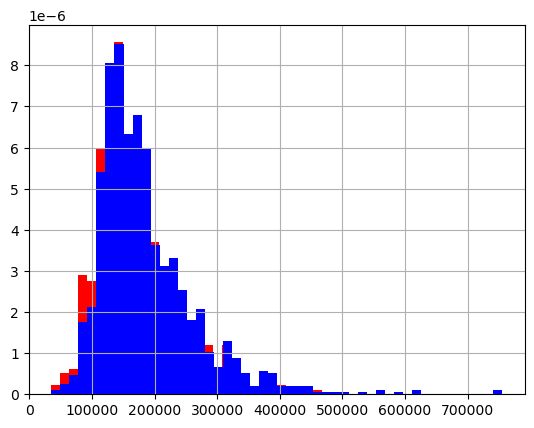

In [186]:
dataset["SalePrice"].hist(bins=50, density=True, color="red")
dataset_noNan["SalePrice"].hist(bins=50, density=True, color="blue")
plt.show()

# Imputacion variables numericas mayor a 5%

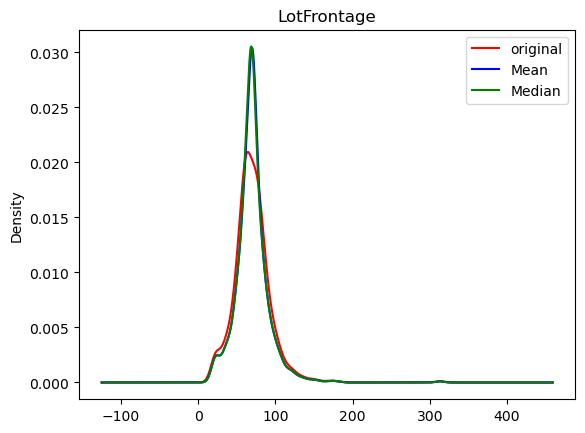

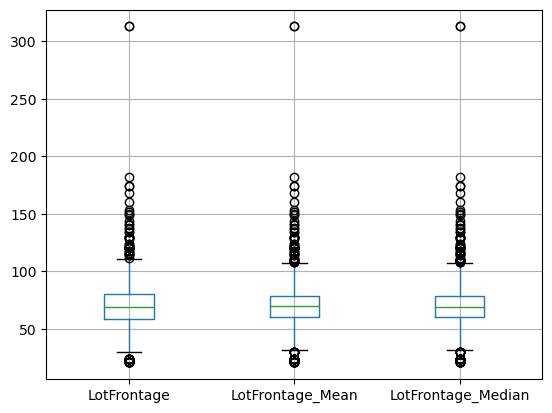

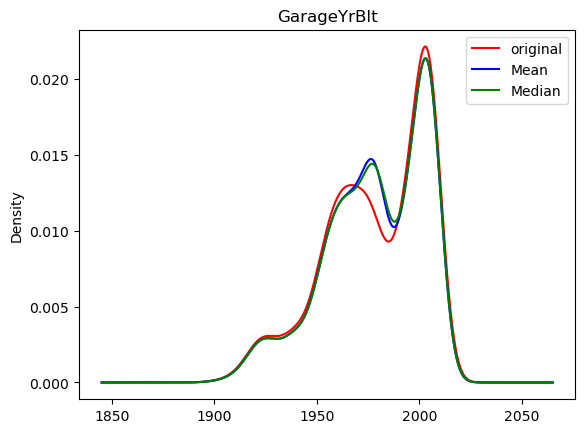

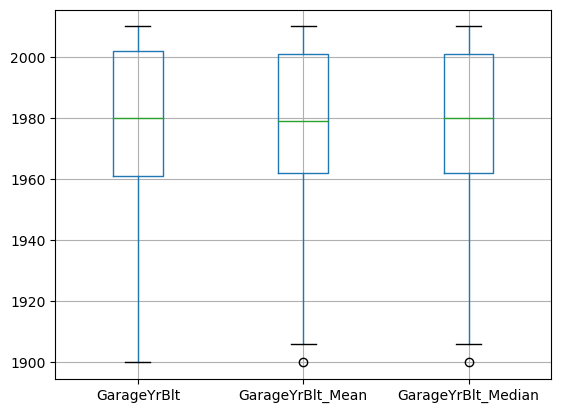

In [187]:
for col in numeric_na_cols:
    media = dataset[col].mean()
    mediana = dataset[col].median()
    dataset[f"""{col}_Mean"""] = np.round(dataset[col].fillna(media))
    dataset[f"""{col}_Median"""] = np.round(dataset[col].fillna(mediana))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title(col)
    dataset[f"""{col}"""].plot.density(color="red", label="original")
    dataset[f"""{col}_Mean"""].plot.density(color="blue", label="Mean")
    dataset[f"""{col}_Median"""].plot.density(color="green", label="Median")
    ax.legend()
    plt.show()

    dataset[[col, f"""{col}_Mean""", f"""{col}_Median"""]].boxplot()
    plt.show()

# La grafica de LotFrontage se deforma un poco al utilizar la media o mediana pero al ver el boxplot se observa que no afecta mucho la cantidad de outliers
# Para GarageYrBlt la grafica no se deforma mucho por lo que se podria utilizar la media para llenar los datos faltantes

# Imputacion Categorica

In [188]:
missing_cat_data = dataset[categorical_na_cols]
missing_cat_data.head()


,Alley,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SalePrice
0,NaN,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN,208500
1,NaN,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN,181500
2,NaN,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN,223500
3,NaN,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN,140000
4,NaN,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN,250000


In [189]:
print(missing_cat_data.isnull().mean())


Alley           0.937671
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
SalePrice       0.000000
dtype: float64


In [190]:
for col in missing_cat_data:
    print(col)
    print(missing_cat_data[col].value_counts() / len(missing_cat_data))
    print("\n")

Alley
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64


FireplaceQu
Gd    0.260274
TA    0.214384
Fa    0.022603
Ex    0.016438
Po    0.013699
Name: FireplaceQu, dtype: float64


GarageType
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64


GarageFinish
Unf    0.414384
RFn    0.289041
Fin    0.241096
Name: GarageFinish, dtype: float64


GarageQual
TA    0.897945
Fa    0.032877
Gd    0.009589
Ex    0.002055
Po    0.002055
Name: GarageQual, dtype: float64


GarageCond
TA    0.908219
Fa    0.023973
Gd    0.006164
Po    0.004795
Ex    0.001370
Name: GarageCond, dtype: float64


PoolQC
Gd    0.002055
Ex    0.001370
Fa    0.001370
Name: PoolQC, dtype: float64


Fence
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64


MiscFeature
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: MiscFeature, dtype: floa

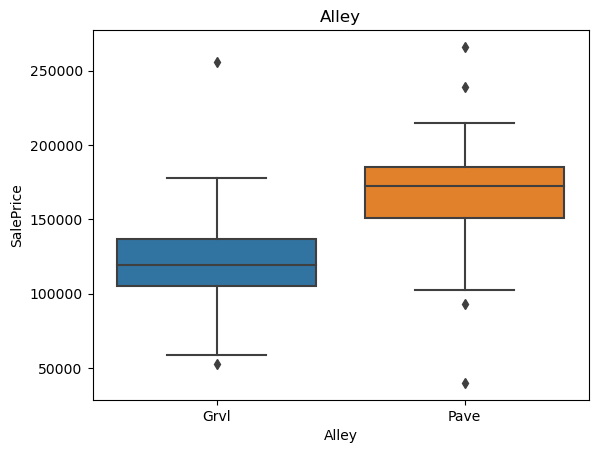

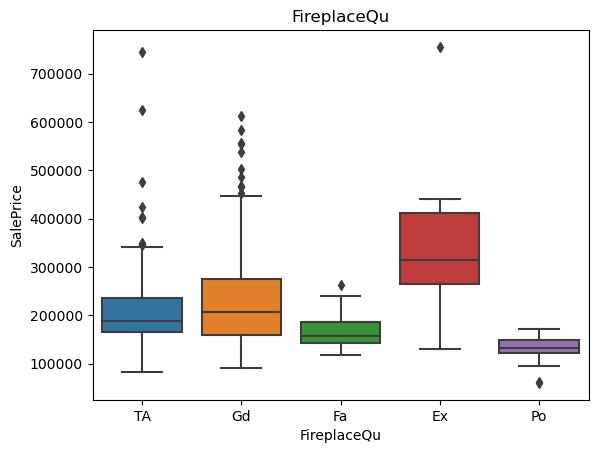

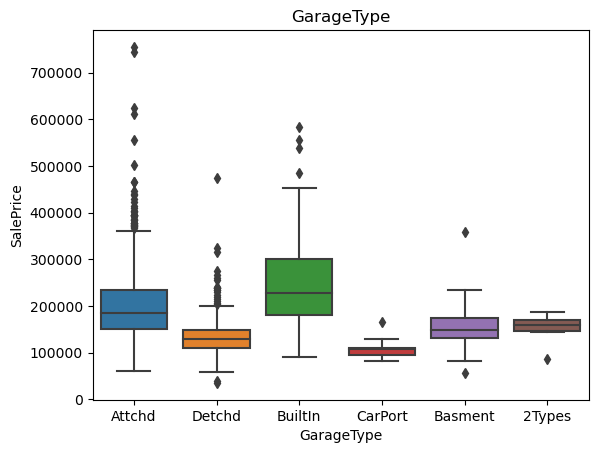

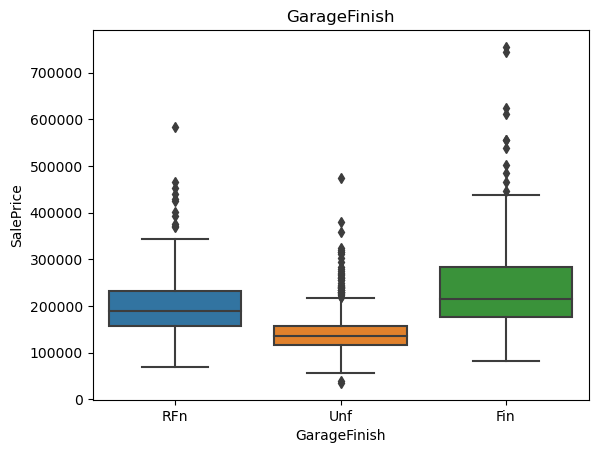

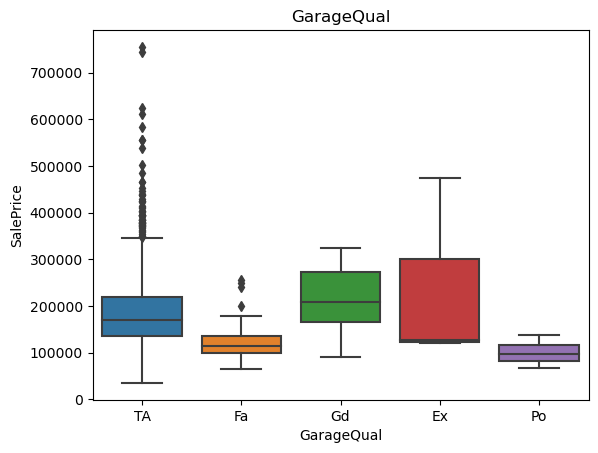

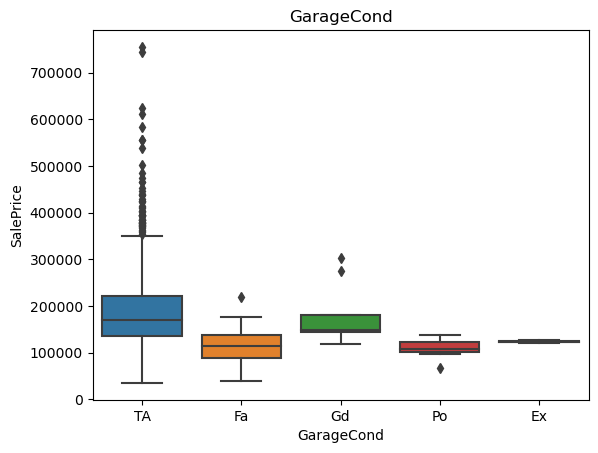

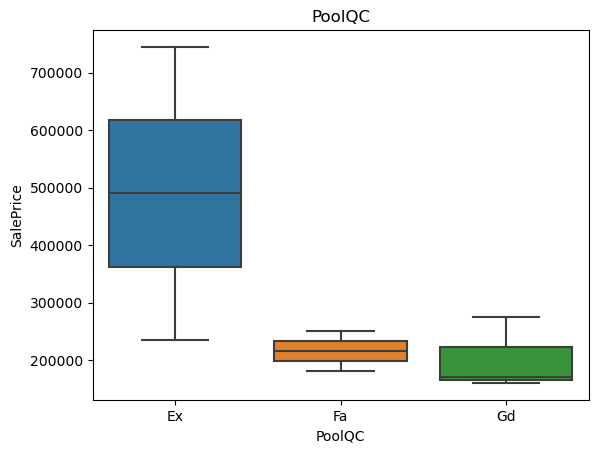

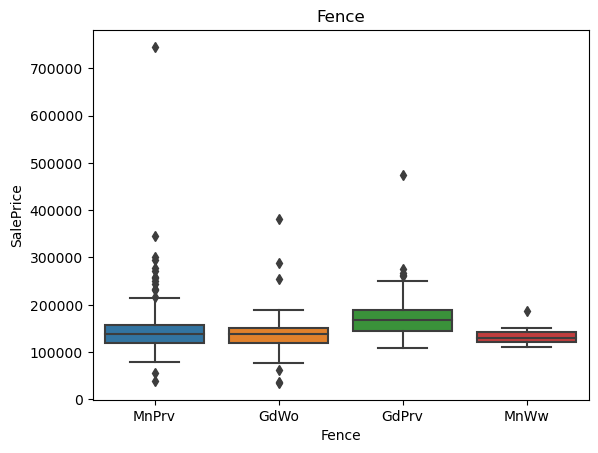

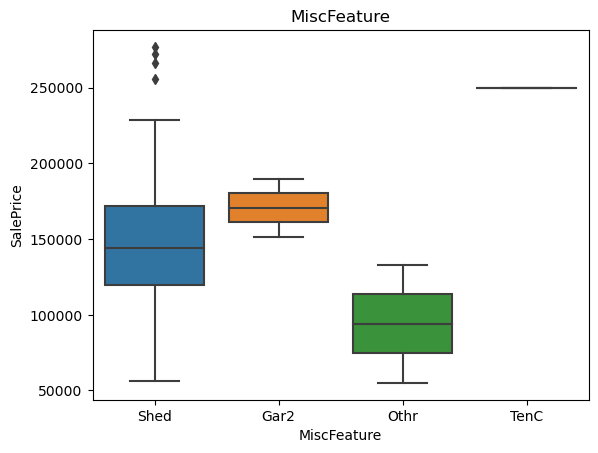

In [191]:
for col in categorical_na_cols:
    if col != "SalePrice":
        sns.boxplot(x=missing_cat_data[col], y=missing_cat_data["SalePrice"])
        plt.title(col)
        plt.show()

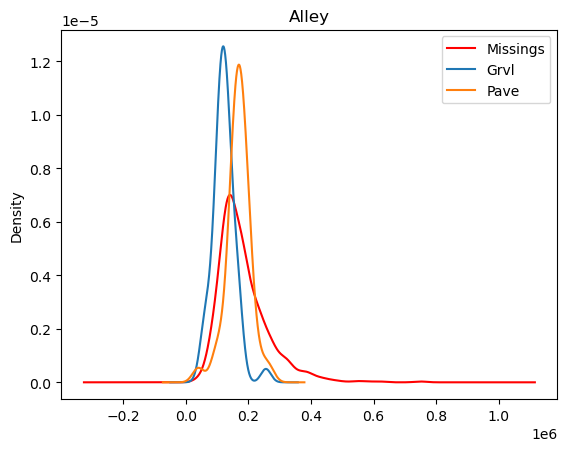

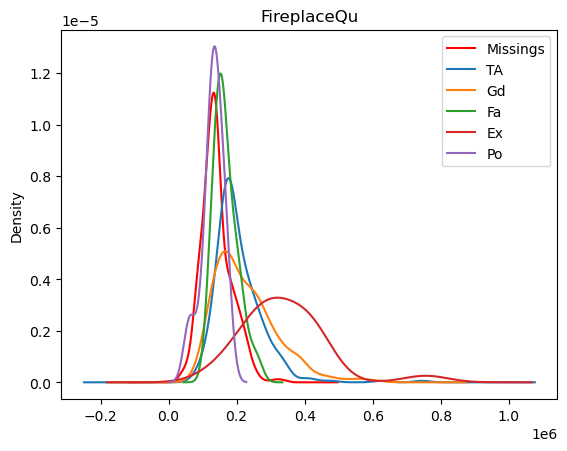

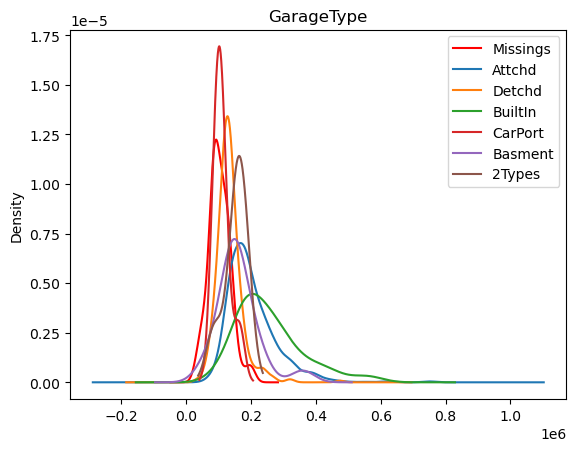

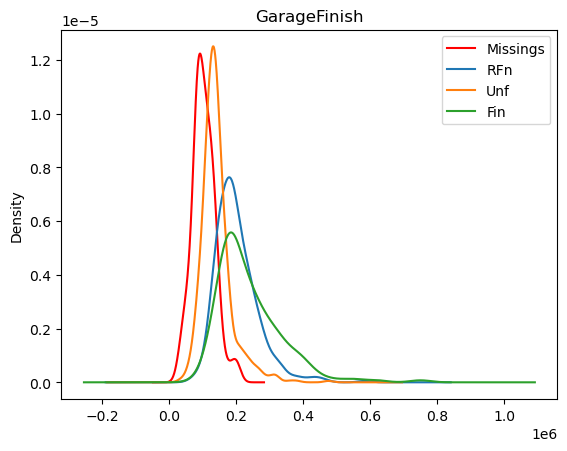

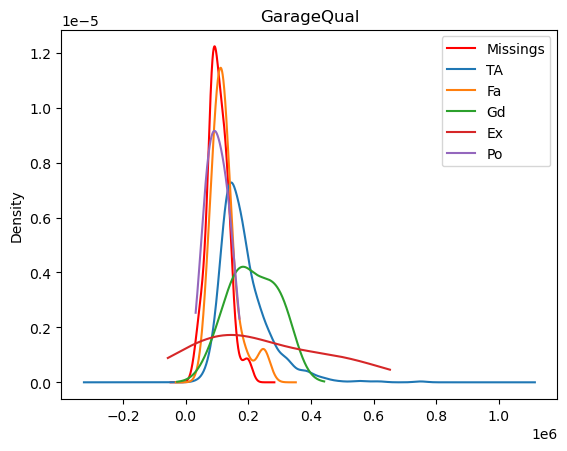

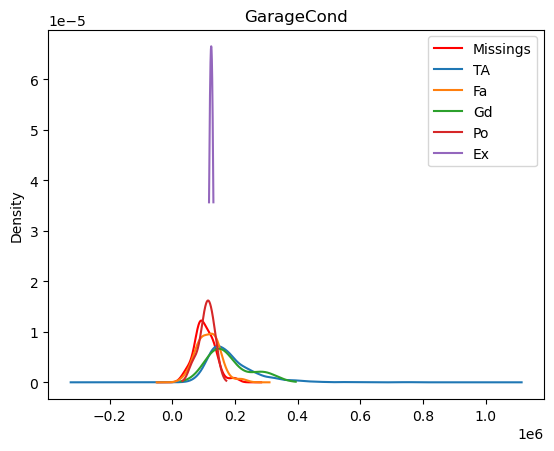

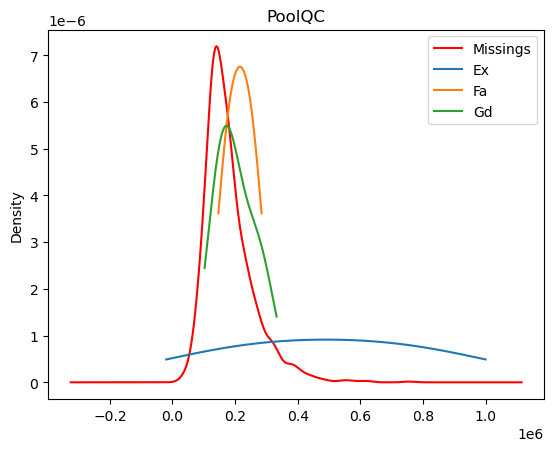

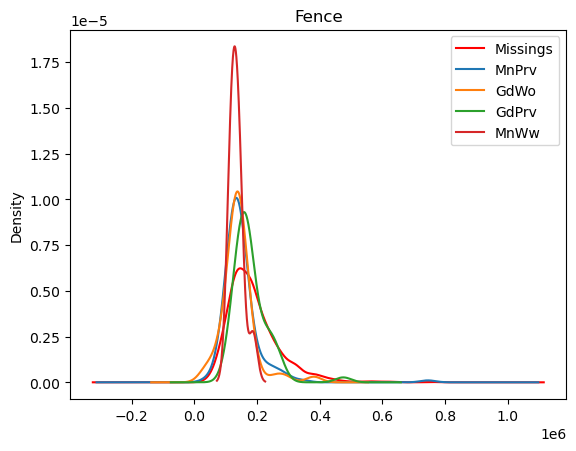

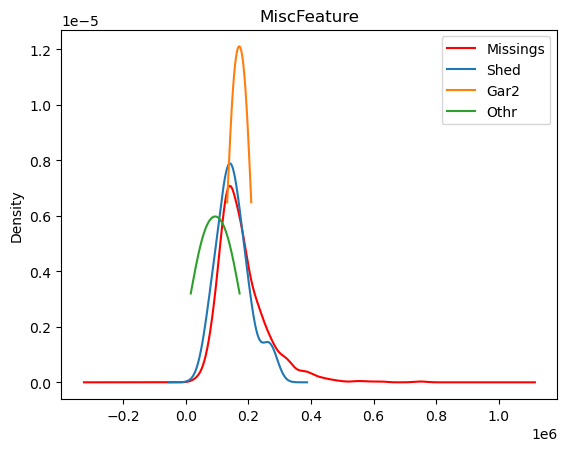

In [192]:
for col in missing_cat_data:
    if col != "SalePrice":
        fig = plt.figure()
        ax = fig.add_subplot(111)
        missing_cat_data[missing_cat_data[col].isnull()]["SalePrice"].plot(
            kind="kde", color="red", label="Missings"
        )
        for cat in missing_cat_data[col].unique():
            if (
                isinstance(cat, str)
                and len(missing_cat_data[missing_cat_data[col] == cat]) > 1
            ):
                missing_cat_data[missing_cat_data[col] == cat]["SalePrice"].plot(
                    kind="kde", label=cat
                )
        ax.legend()

        plt.title(col)
        plt.show()

In [193]:
# Llenar valores faltantes con las categorias que mas se asemejan a la grafica de densidad de valores faltantes y en variables con menos del 20% de valores faltantes
missing_cat_data["GarageType"].fillna("Detchd", inplace=True)
missing_cat_data["GarageQual"].fillna("Fa", inplace=True)
missing_cat_data["GarageCond"].fillna("Fa", inplace=True)
missing_cat_data["GarageFinish"].fillna("Unf", inplace=True)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_34212\766918646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_cat_data["GarageType"].fillna("Detchd", inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_34212\766918646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_cat_data["GarageQual"].fillna("Fa", inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_34212\766918646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

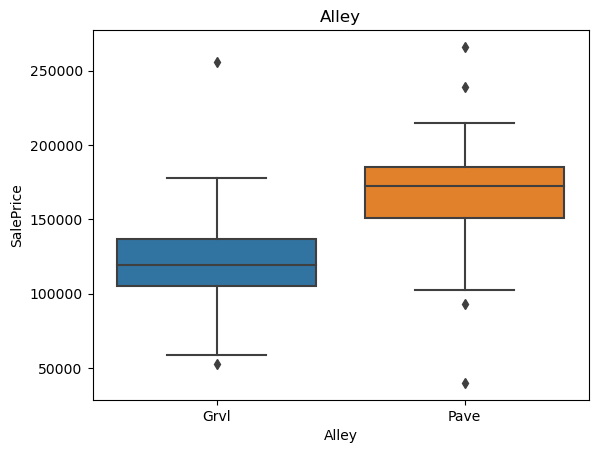

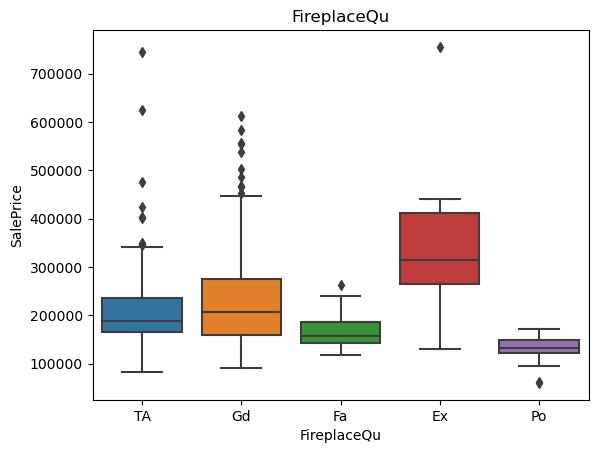

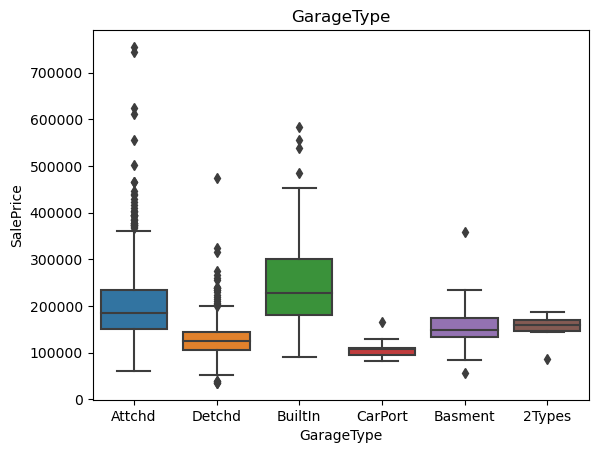

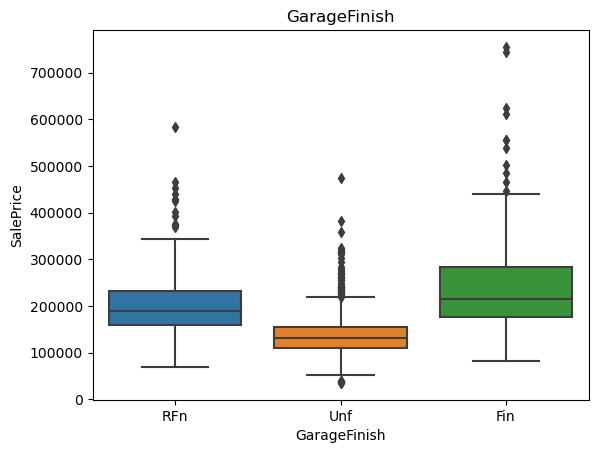

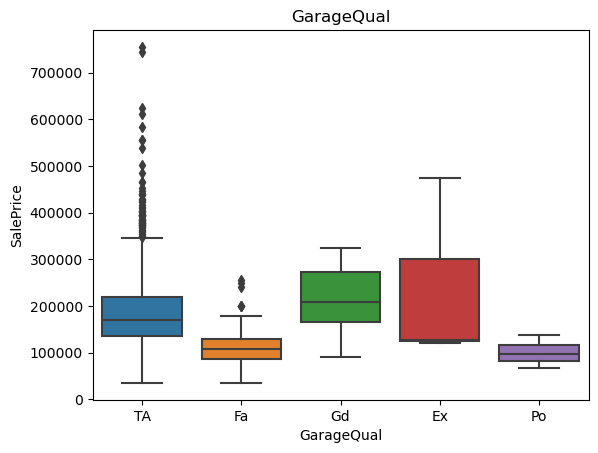

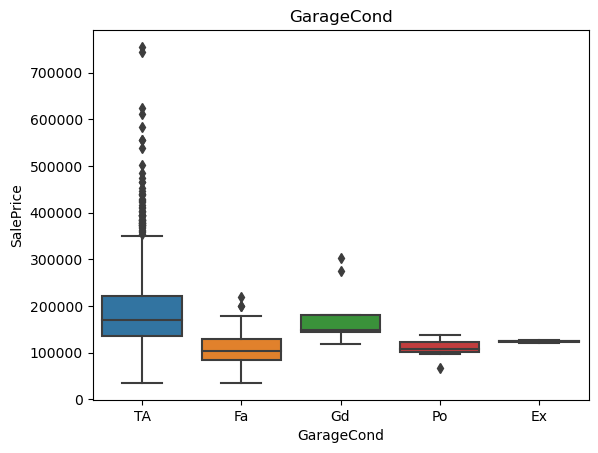

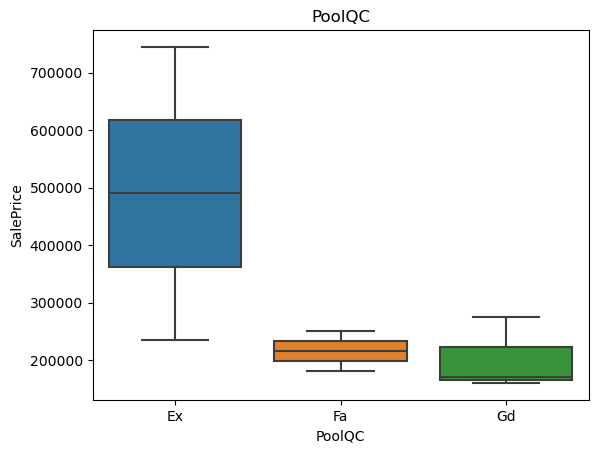

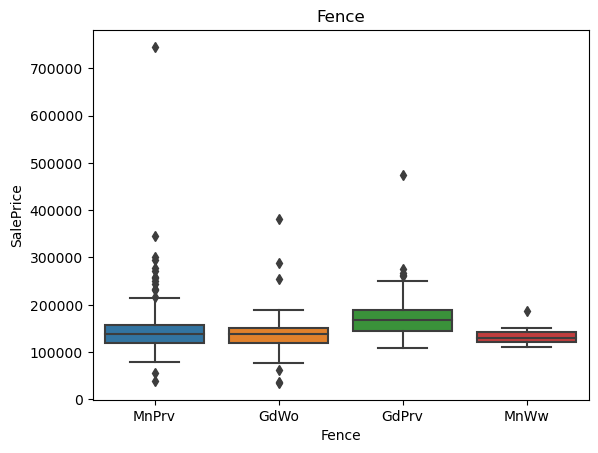

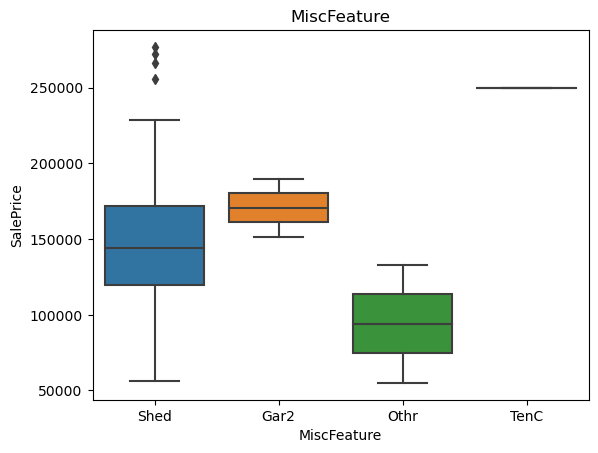

In [194]:
for col in categorical_na_cols:
    if col != "SalePrice":
        sns.boxplot(x=missing_cat_data[col], y=missing_cat_data["SalePrice"])
        plt.title(col)
        plt.show()